In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Revisão: Visão Computacional

## Como um computador interpreta uma imagem RGB

<img src=https://drek4537l1klr.cloudfront.net/elgendy/HighResolutionFigures/figure_1-17.png width=600>

## Feature extraction

A extração de features é um componente central do pipeline de visão computacional. Na verdade, todo o modelo de aprendizado profundo funciona em torno da ideia de extrair recursos úteis que definem claramente os objetos na imagem.

## O que é uma feature em visão computacional?

Na visão computacional, uma feature é um dado mensurável em sua imagem que é exclusivo para esse objeto específico. Pode ser uma cor distinta em uma imagem ou uma forma específica, como uma linha, borda ou um segmento de imagem. Uma boa feature é um elemento da imagem que pode ser usado para distinguir objetos uns dos outros. Por exemplo, se eu lhe der um recurso como uma roda e pedir para você adivinhar se o objeto é uma motocicleta ou um cachorro. Qual seria o seu palpite? Uma motocicleta. Neste caso, a roda é uma característica forte que distingue claramente entre motocicletas e cães. Se eu lhe der a mesma característica (uma roda) e pedir para você adivinhar se o objeto é uma bicicleta ou uma motocicleta. Nesse caso, essa feature não é forte o suficiente para distinguir entre os dois objetos. Então precisamos procurar mais features como um espelho, placa de automével, talvez um pedal que descreva coletivamente um objeto.

<img src=https://freecontent.manning.com/wp-content/uploads/Elgendy_tCVPp4_01.png width=600 >

## Porque usar as features?

**A imagem de entrada tem muitas informações extras que não são necessárias para a classificação.** Portanto, o primeiro passo após o pré-processamento da imagem é simplificá-la extraindo as informações importantes e descartando as informações não essenciais. Ao extrair cores ou segmentos de imagem importantes, podemos transformar dados de imagem grandes e complexos em conjuntos menores de recursos. Isso torna a tarefa de classificar imagens com base em suas características mais simples e rápida.

Considere o exemplo abaixo. Suponha que recebemos um conjunto de dados de 10.000 imagens de motocicletas, cada uma com 1.000 largura x 1.000 altura. Algumas imagens têm fundos sólidos e outras têm fundos cheios de dados desnecessários. Quando essas milhares de imagens são alimentadas aos algoritmos de extração de recursos, perdemos todos os dados desnecessários que não são importantes para identificar motocicletas e mantemos apenas uma lista consolidada de recursos úteis que podem ser alimentados diretamente no classificador. Esse processo é muito mais simples do que fazer o classificador examinar um conjunto de dados de 10.000 imagens para aprender as propriedades das motocicletas.

## Pipeline: dos dados ao modelo

<img src= https://freecontent.manning.com/wp-content/uploads/Elgendy_tCVPp5_03.png width=600>

<img src=https://freecontent.manning.com/wp-content/uploads/Elgendy_tCVPp1_03.png width=600 >


### Técnicas de pré-processamento

##### 1. RGB -> grayscale:

Em certos problemas, você achará útil perder informações desnecessárias de suas imagens para reduzir o espaço ou a complexidade computacional. Isso ocorre porque em muitos objetos, a cor não é necessária para reconhecer e interpretar uma imagem. A escala de cinza pode ser boa o suficiente para reconhecer certos objetos.

Há uma série de aplicações para as quais a cor é muito importante:
- diagnóstico para identificar erupções cutâneas vermelhas em imagens médicas que depende muito da intensidade da cor vermelha na pele.
- detecção de faixas em carros autônomos para identificar a diferença entre as faixas amarela e branca porque são tratadas de forma diferente.
- detecção de doenças em plantas.

##### 2. Redimensionar o tamanho das imagens: 

Uma restrição importante que existe em alguns algoritmos de aprendizado de máquina, como CNN, é a necessidade de redimensionar as imagens em seu conjunto de dados para uma dimensão unificada. Isso implica que nossas imagens devem ser pré-processadas e dimensionadas para ter larguras e alturas idênticas antes de alimentar o algoritmo de aprendizado.

##### 3. Standardize os pixels das imagens: 

Sabemos que as imagens podem vir tanto com valores entre 0 e 1 quanto 0 e 255, mas precisamos garantir que todas elas tenham o mesmo range de valores para cada pixel.

##### 4. Data augmentation:

Data augmentation é a técnica de pré-processamento que envolve aumentar o conjunto de dados existente com versões perturbadas das imagens existentes. Variar as escalas, rotações e outras transformações afins são típicas. Isso é feito para ampliar seu conjunto de dados e expor a rede neural a uma ampla variedade de variações de suas imagens. Isso torna mais provável que seu modelo reconheça objetos quando eles aparecem em qualquer forma e formato. Aqui está um exemplo de aumento de imagem aplicado a uma imagem de borboleta:

<img src=https://freecontent.manning.com/wp-content/uploads/Elgendy_tCVPp3_03.png width=600 >

##### 5. Outras técnicas:

Em alguns projetos, pode ser necessário remover a cor de fundo das imagens para reduzir o ruído. Outros podem exigir que você clareie ou escureça suas imagens. Em suma, quaisquer ajustes que você precise aplicar ao seu conjunto de dados são considerados uma espécie de pré-processamento. E você selecionará as técnicas de processamento apropriadas com base no conjunto de dados disponível e no problema que está resolvendo. Isso cria sua intuição de quais você precisa ao trabalhar em seus próprios projetos.


___

In [6]:
# https://kapernikov.com/tutorial-image-classification-with-scikit-learn/
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import pprint
pp = pprint.PrettyPrinter(indent=4)

Importe a imagem 'ada.jpg' e print ela na tela

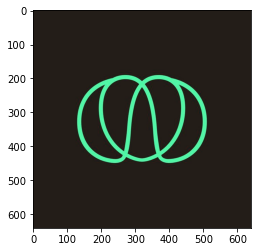

In [10]:
original_bgr = cv2.imread('ada.jpg')
plt.imshow(original_bgr);

Crie um arquivo utils.py na mesma pasta em que encontra-se esse notebook e adicione a classe criada no desafio da Aula 1.
Importe a classe nesse notebook.

In [13]:
from utils import ImageTransformer

Vamos converter nossa imagem para RGB e visualizar

Rotacione a imagem em 90º com redução de escala em 80% e visualize o resultado:

Como podemos aplicar a rotação acima e converter a imagem para escala de cinza?

Rotacione a imagem original e equalize seu histograma:

Utilize o método `clahe` e altere os parâmetros `clip_limit` e `tile_size` para equalizar localmente a imagem:

Adicione uma função que converte os valores da imagem de 0 à 255 para 0 à 1.0  e a chame de scale.

Adicione na nossa classe a função criada na aula 1 de mudança de brilho e contraste e teste para alguns valores:

Utilizando o `Pipeline` e o `FunctionTransformer` do sklearn crie um pipeline que rotacione a imagem em 90 graus e a converta para escala de cinza.

## Filtros

- **Convolução:** Operação matemática entre duas matrizes que geralmente possuem tamanhos diferentes. 
- **Kernel:** Kernel de convolução é uma matriz 2D que é utilizada para a aplicação de filtros em imagens a fim de extrair features.
- **Padding:** refere-se à quantidade de pixels adicionados às bordas de uma imagem após ser processada pelo kernel.

![https://miro.medium.com/max/658/0*jLoqqFsO-52KHTn9.gif](https://miro.medium.com/max/658/0*jLoqqFsO-52KHTn9.gif)

### Tipos de filtros
- Blurring (desfoque): Torna a transição entre diferentes valores de pixel suave em vez de nítida (sharp). Com isso, reduz algum tipo de ruído na imagem. Por este motivo, também é conhecido como suavização (*smoothing*). 
- Sharpening (nitidez): Filtros para tornar as imagens mais nítidas acentuando as bordas. Eles essencialmente fazem o oposto do desfoque.
- Detecção de bordas (edge detection): Detecção de gradientes de cor nas imagens. Filtros comuns: Sobel, Canny e Operador Laplaciano


Aplicando convolução em 1 canal

In [ ]:
kernel = np.asarray([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])


In [ ]:
# 3 canais na função principal


Vamos utilizar o Sobel para detectar as bordas da nossa imagem:

___

## Reconhecimento de Objeto

<img src=https://www.researchgate.net/profile/Mathias-Rieder/publication/334363440/figure/fig1/AS:816456560308224@1571669821158/Comparison-of-semantic-segmentation-classification-and-localization-object-detection.ppm>

Principais tarefas na Visão Computacional:

- **Classificação de Imagens:** Prever o tipo ou classe de um objeto em uma imagem.

    - Entrada: Uma imagem com um único objeto.
    - Saída: Um rótulo de classe (por exemplo, um ou mais inteiros que são mapeados para rótulos de classe).

<br>

- **Localização de objetos:** Localizar a presença de objetos em uma imagem e indicar sua localização com uma caixa delimitadora.

    - Entrada: Uma imagem com um ou mais objetos.
    - Saída: Uma ou mais caixas delimitadoras (por exemplo, definidas por um ponto, largura e altura).


<br>

- **Detecção de Objetos:** Localize a presença de objetos com uma caixa delimitadora e tipos ou classes dos objetos localizados em uma imagem. A detecção de objetos combina essas duas tarefas e localiza e classifica um ou mais objetos em uma imagem.

    - Entrada: Uma imagem com um ou mais objetos.
    - Saída: Uma ou mais caixas delimitadoras (por exemplo, definidas por um ponto, largura e altura) e um rótulo de classe para cada caixa delimitadora.

<br>

- **Segmentação de Objetos:** processo de dividir uma imagem digital em múltiplas regiões ou objetos, com o objetivo de simplificar e/ou mudar a representação de uma imagem para facilitar a sua análise.

    - Entrada: Uma imagem com um ou mais objetos (H x W x 3).
    - Saída: Uma máscara com pixels variando de n-classes com shape (H x W x n-classes)


___

## Modelagem: Classificação de Imagens

Vamos agora treinar um modelo clássico de Machine Learning em um dataset de imagens:

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces()

In [ ]:
X = dataset.data
y = dataset.target

Essa versão disponibilizada pelo scikit-learn contém 400 imagens de 64 x 64 pixels. Podemos visualizar como é uma imagem do nosso dataset:

Vamos selecionar 8 imagens aleatoriamente para conhecermos melhor o dataset.

In [ ]:
np.random.seed(21)
idx_rand = np.random.randint(len(X), size=8)

In [ ]:
plt.figure(figsize=(14, 8))
for p, i in enumerate(idx_rand):
    plt.subplot(2, 4, p + 1)
    plt.imshow(X[i, :].reshape((64, 64)), cmap='gray')
    plt.axis('off')

Vamos separar em treino e teste

Vamos agora implementar um modelo de classificação utilizando o Random Forest:

Vamos agora aplicar algumas transformações nas nossas imagens como a equalização e o clahe além de um PCA para reduzir a dimensionalidade do nosso dataset.

OBS: para a utilização dessas trasformações precisamos que nossos dados de entrada sejam inteiros indo de 0 à 255.

In [ ]:
# importa pipeline, FunctionTransformer e PCA

# Cria função para converter a imagem de flat para 64x64

# Equaliza o histograma com clahe

# Converte a imagem para flat

# Faz um scale para a imagem voltar a ter valores de 0 à 1

# Instancia PCA com n_components=0.9

# Cria Pipeline

# Faz fit_transform no pipeline


In [ ]:
print("Tamanho do dataset original: ", X_train.shape)
print("Quantidade de linhas no novo dataset: ", len(data))
print("Quantidade de colunas no novo dataset: ", data[0].shape)
print("Tamanho do dataset novo: ", data.shape)

Podemos verificar como estão as imagens após o pré-processamento:

Agora vamos adicionar o RandomForest no nosso pipe:

In [ ]:
# Adiciona RF com max_depth=6

# fit do pipe


___
___
___

## Bibliografia e Aprofundamento
- https://livebook.manning.com/book/grokking-deep-learning-for-computer-vision/chapter-1/2
- https://kapernikov.com/tutorial-image-classification-with-scikit-learn/
- https://notebook.community/marcotcr/lime/doc/notebooks/Tutorial%20-%20Faces%20and%20GradBoost
- https://freecontent.manning.com/the-computer-vision-pipeline-part-3-image-preprocessing/